 # Introduction

* 1. What is Market Basket Analysis?
* 2. How is MBA calculated ?
* 3. Doing MBA with Python.

# 1. What is Market Basket Analysis (MBA)?

<h3>So what is MBA?</h3>
<ul>
    <li>It's a group of techniques often used in retail to uncover <b>associations</b> between items.</li>
    <li> If a customer is buying a particular product he is likely to buy some related goods to compliment the first one. </li>
</ul>

<img src="https://cdn-images-1.medium.com/max/800/1*YSDKzjONGi1xB6ub2gidXw.jpeg" alt="Recommender">

<h3>Basically, MB will tell things like:</h3>

<ul>
    <li>If bananas are purchased then avocados are also purchased</li>
    <li> If both milk and bread are purchased then eggs are purchased 50% of the time.</li>
</ul>

<h3>What is MBA used for?</h3>

<ul>
    <li>Allowing retailers to make promotional product bundles and send coupons.</li>
    <li>improving store layout optimise flow and cross-sell. Content placement in e-commerce. </li>
    <li>Inventory planning and pricing. </li>
    <li>Creating product segments/groups - Category management.</li>
    <li>Identifying product gaps in baskets.</li>
    <li>Building E-Commerce recommendation engines.</li>
    <li>Fraud detection.</li>
</ul>

# 2. How is it calculated using Python?

<h3>We will be using the Apriori algorithm to calculate MBA</h3>

<ul>
    <li>Classic Data Mining algorithm.</li>
    <li>Allows us to find frequent itemsets and association rules.</li>
    <li>It's also used for example in healthcare to identify the relationships between drugs and adverse reactions.</li>
</ul>

<h3>The algorithm uses has three basic steps:</h3>

<ol>
    <li>Calculate support.</li>
    <li>Calculate confidence.</li>
    <li>Calculate lift.</li>
</ol>

<h3>Support:</h3>

<p>Says how many times a product appears in customer transactions.</p>
<img src="https://annalyzin.files.wordpress.com/2016/03/association-rule-support-eqn.png?w=248&h=68" alt="Recommender">
<img src="https://annalyzin.files.wordpress.com/2016/04/association-rule-support-table.png?w=503&h=447" alt="Recommender">
<ul>
    <li>Support {apple} 50%</li>
    <li>Support {apple, beer, rice} 2/8 or 25%</li>
</ul>

<a style = "font-size:16px" href=https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html>Source</a>

<h3>Confidence:</h3>

<p>Says how likely item Y is purchased when item X is purchased, expressed as {X -> Y}.</p>
<p>The confidence of {apple -> beer} is 3 out of 4, or 75%</p>

<img src="https://annalyzin.files.wordpress.com/2016/03/association-rule-confidence-eqn.png?w=527&h=77" alt="Recommender">

<p style = "font-size:20px">One drawback of the confidence measure is that it might misrepresent the importance of an association. This is because it only accounts for how popular apples are, but not beers. If beers are also very popular in general, there will be a higher chance that a transaction containing apples will also contain beers, thus inflating the confidence measure. <b>To account for the base popularity of both constituent items, we use a third measure called lift.</b></p>

<a style = "font-size:16px" href=https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html>Source</a>

<h3>Lift</h3>

<p>This says how likely item Y is purchased when item X is purchased, while controlling for how popular item Y is. </p>
<p>The confidence of {apple -> beer} is 3 out of 4, or 75%</p>

<img src="https://annalyzin.files.wordpress.com/2016/03/association-rule-lift-eqn.png?w=566&h=80" alt="Recommender">

<ul>
    <li>lift <b>equal</b> to 1 implies no relationship between A and B.</li>
    (ie: A and B occur together only by chance)
    <li>lift <b>more than</b> 1 implies that there is a positive relationship between A and B. </li>
    (ie:  A and B occur together more often than random)
    <li>lift <b>less than</b> 1 implies that there is a negative relationship between A and B. </li>
    (ie:  A and B occur together less often than random)
</ul>

<a style = "font-size:16px" href=https://www.kdnuggets.com/2016/04/association-rules-apriori-algorithm-tutorial.html>Source</a>

# 3. Doing MBA with Python.

## Data Preparation

### Importing Data

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import collections
import itertools

In [2]:
aisles = pd.read_csv("../Data/aisles.csv")
products = pd.read_csv("../Data/products.csv")
departments = pd.read_csv("../Data/departments.csv")
order_products_prior = pd.read_csv("../Data/order_products__prior.csv")

### Sampling Data

In [3]:
#Example of each the newly created dataframes
display(products.head())
display(order_products_prior.head())
display(departments.head())
display(aisles.head())

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

order_id  product_id  add_to_cart_order  reordered
0         2       33120                  1          1
1         2       28985                  2          1
2         2        9327                  3          0
3         2       45918                  4          1
4         2       30035                  5          0

department_id department
0              1     frozen
1              2      other
2              3     bakery
3              4    produce
4              5    alcohol

aisle_id                       aisle
0         1       prepared soups salads
1         2           specialty cheeses
2         3         energy granola bars
3         4               instant foods
4         5  marinades meat preparation

In [4]:
orders = order_products_prior#[order_products_prior['order_id']<155943]

### Creating the data set

* MERGE PRODUCTS AND DEP/AISLE INFO

In [5]:
# Merge orders and products to give Product IDs a description.
orders_prior = pd.merge(products, orders, on="product_id")

# Merge orders and department to give department ids a description.
orders_deps_prior = pd.merge(orders_prior, departments, on="department_id")

# Merge orders and aisles to give aisles ids a description.
orders_total_prior = pd.merge(orders_deps_prior, aisles, on="aisle_id")

# Delete department_id and aisle_id from table as we will use their description.
orders_total_prior.drop(['department_id', 'aisle_id'], inplace=True, axis=1)

#Example of the final table created by merging the different data sources. 
orders_total_prior.sample(5).head(5)

product_id                      product_name  order_id  \
15312665       23543    Organic Extra Large Brown Eggs    643242   
4778672         3274                Black Tea Pyramids    578851   
24846182       45007                  Organic Zucchini    325599   
23702159       27521  Organic Lacinato (Dinosaur) Kale    283142   
29795550       22220   Original Roasted Seaweed Snacks   1445501   

          add_to_cart_order  reordered     department             aisle  
15312665                  6          1     dairy eggs              eggs  
4778672                   6          1      beverages               tea  
24846182                  7          1        produce  fresh vegetables  
23702159                 17          0        produce  fresh vegetables  
29795550                  6          0  international       asian foods

### Exploring the Data

#### Aisles

In [6]:
# Count the number of times a product from each aisle is bought.
aisle_orders = orders_total_prior.aisle.value_counts().to_frame().sort_index(
    ascending=True).reset_index().rename(columns={
        "aisle": "orders",
        "index": "aisle"
    })

# Count the number of times a product from each aisle is reordered.
aisle_orders['reorders'] = orders_total_prior.groupby(
    'aisle')['reordered'].sum().to_frame().sort_values(
        by='aisle', ascending=True).reset_index()['reordered']

#Example of the table generated.
aisle_orders.head(5)

aisle  orders  reorders
0  air fresheners candles   19851      6135
1             asian foods  166607     58501
2        baby accessories    8160      4496
3     baby bath body care    8581      2538
4       baby food formula  382456    225748

In [7]:
# Obtain the percentage of times that a product is reordered with regards to total sales.
aisle_orders['perc_reorders'] = aisle_orders['reorders']/ aisle_orders['orders']

#Example of the table generated.
aisle_orders.head(5)

aisle  orders  reorders  perc_reorders
0  air fresheners candles   19851      6135       0.309052
1             asian foods  166607     58501       0.351132
2        baby accessories    8160      4496       0.550980
3     baby bath body care    8581      2538       0.295770
4       baby food formula  382456    225748       0.590259

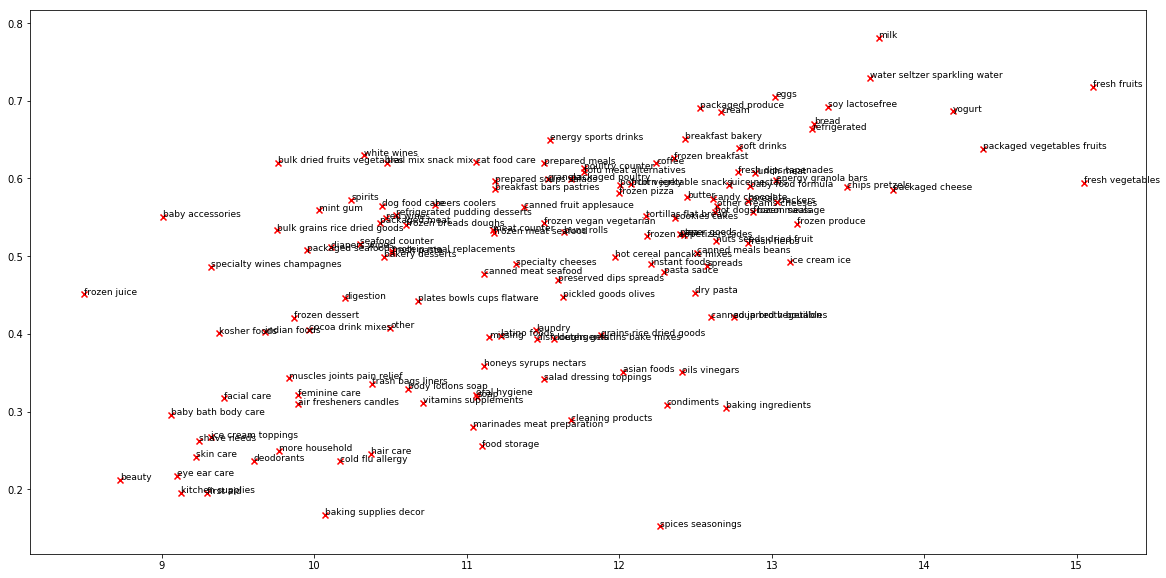

In [8]:
# Plot Reorder Percentage vs. Log(Sales) for each aisle.

import matplotlib.pyplot as plt

# To see the plot in jupyter notebook use this command:
%matplotlib inline

# To specify the size of the output use the following command.
plt.rcParams['figure.figsize'] = [20, 10]


types = aisle_orders['aisle']
x_coords = np.log(aisle_orders['orders'])
y_coords = aisle_orders['perc_reorders']

for i, type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, type, fontsize=9)
    
plt.show()

#### Departments

In [9]:
# Count the number of times a product from each department is bought.
dept_orders = orders_total_prior.department.value_counts().to_frame(
).sort_index(ascending=True).reset_index().rename(columns={
    "department": "orders",
    "index": "aisle"
})

# Count the number of times a product from each department is reordered.
dept_orders['reorders'] = orders_total_prior.groupby(
    'department')['reordered'].sum().to_frame().sort_values(
        by='department', ascending=True).reset_index()['reordered']

# Obtain the percentage of times that a product in that department is reordered 
# with regards to total sales.
dept_orders['perc_reorders'] = dept_orders['reorders'] / dept_orders['orders']

#Example of the table generated.
dept_orders.head(5)

aisle   orders  reorders  perc_reorders
0    alcohol   153696     87595       0.569924
1     babies   423802    245369       0.578971
2     bakery  1176787    739188       0.628141
3  beverages  2690129   1757892       0.653460
4  breakfast   709569    398013       0.560922

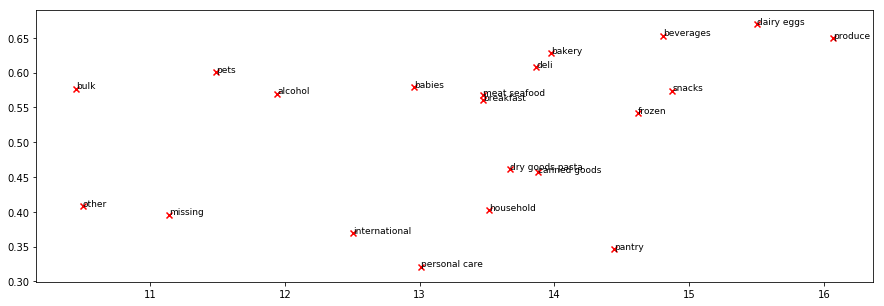

In [10]:
# Plot Reorder Percentage vs. Log(Sales) for each department.

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]

# simulating a pandas df['type'] column
types = dept_orders['aisle']
x_coords = np.log(dept_orders['orders'])
y_coords = dept_orders['perc_reorders']

for i, type in enumerate(types):
    x = x_coords[i]
    y = y_coords[i]
    plt.scatter(x, y, marker='x', color='red')
    plt.text(x, y, type, fontsize=9)
    
plt.show()


##  Apriori Algorithm

In [11]:
# Count the total number of unique transactions.
N_Transactions = len(orders_prior['order_id'].unique())
display(N_Transactions)

3214874

### Apriority Priority

#### Product frequency in baskets

In [35]:
orders_total_prior.product_name.count()

32434489

In [12]:
# Count the total number of times each appears in a basket.
count_prods = orders_total_prior.groupby("product_name")['order_id'].count()
# The output is a pandas series. 
# To make calculations easier lets format it into a dataframe. 

# Create a dataframe, rename the count to 'frequ' and sort values. 
count_prods = count_prods.to_frame().rename(columns={
    'order_id': 'freq'
}).sort_values(
    by="freq", ascending=False).reset_index()

#Example of the table generated.
count_prods.head()

product_name    freq
0                  Banana  472565
1  Bag of Organic Bananas  379450
2    Organic Strawberries  264683
3    Organic Baby Spinach  241921
4    Organic Hass Avocado  213584

#### Support calculation for each product

In [13]:
# Obtain the support values for each product. 
count_prods['supp'] = count_prods['freq'] / N_Transactions * 100

#Example of the table generated.
count_prods.head()

product_name    freq       supp
0                  Banana  472565  14.699332
1  Bag of Organic Bananas  379450  11.802951
2    Organic Strawberries  264683   8.233075
3    Organic Baby Spinach  241921   7.525054
4    Organic Hass Avocado  213584   6.643620

### Filtering

In [14]:
# Filter so around 60% of products are still present.
count_prods.describe()

freq          supp
count   49677.000000  49677.000000
mean      652.907563      0.020309
std      4792.114416      0.149061
min         1.000000      0.000031
25%        17.000000      0.000529
50%        60.000000      0.001866
75%       260.000000      0.008087
max    472565.000000     14.699332

In [15]:
# Support value chosen:
support_value = 0.01 #21%

# Filter products 
prod_filter = list(count_prods[count_prods['supp'] > support_value].product_name)

# Percentage of products that will be taken into account to create the set. 
display(len(prod_filter)*100/count_prods.product_name.count())
display(len(prod_filter))

21.953821688105158

10906

In [36]:
orders_total_prior_filt.product_name.count()

29843570

In [16]:
# Apply the filter to the orders data set so products that are not sufficiently frequent
# are not taken into account. 
orders_total_prior_filt = orders_total_prior[
    orders_total_prior['product_name'].isin(prod_filter)]

N_Transactions = len(orders_total_prior_filt['order_id'].unique())
display(N_Transactions)
#Example of the table generated.
display(orders_total_prior_filt.head())

display(len(orders_total_prior_filt.product_name.unique()))

3194179

product_id                product_name  order_id  add_to_cart_order  \
0           1  Chocolate Sandwich Cookies      1107                  7   
1           1  Chocolate Sandwich Cookies      5319                  3   
2           1  Chocolate Sandwich Cookies      7540                  4   
3           1  Chocolate Sandwich Cookies      9228                  2   
4           1  Chocolate Sandwich Cookies      9273                 30   

   reordered department          aisle  
0          0     snacks  cookies cakes  
1          1     snacks  cookies cakes  
2          1     snacks  cookies cakes  
3          0     snacks  cookies cakes  
4          0     snacks  cookies cakes

10906

### Extracting Sets

In [17]:
# Using the filtered orders we create create lists of products that appear in 
# each order. Note: Basket = Order. 
basket_lists = orders_total_prior_filt.groupby('order_id')['product_name'].apply(list)
len()
#Take lists with more than one product left. 
basket_lists = list(basket_lists[basket_lists.str.len()>1])
# The output is a list of product lists = Baskets. 

In [41]:
basket_lists[basket_lists.str.len()>1].str.len().sum()

29662716

In [66]:
N_Transactions =  len(basket_lists[basket_lists.str.len()>1])
display(N_Transactions)
display(len(basket_lists))

3013325

3194179

In [83]:
basket

['All Natural French Toast Sticks',
 'Banana',
 'Free & Clear Natural Dishwasher Detergent',
 'Freeze Dried Mango Slices',
 'Organic  Sweet & Salty Peanut Pretzel Granola Bars',
 'Organic Mini Sandwich Crackers Peanut Butter',
 'Organic Mixed Berry Yogurt & Fruit Snack',
 'Organic Strawberry Yogurt & Fruit Snack',
 'Purple Carrot & blueberry Puffs']

In [67]:
# With unfrequent product filtered we find product pairs. These are products
# that have been bought together. 
i=0
product_counts = collections.defaultdict(int)
for basket in basket_lists:
    basket.sort()
    for pair in itertools.combinations(basket, 2):
        product_counts[pair] += 1

# The output is a list of product pairs and the frequency with which they appear together. 
display(dict(list(product_counts.items())[0:2]))

{('All Natural No Stir Creamy Almond Butter', 'Carrots'): 84,
 ('All Natural No Stir Creamy Almond Butter', 'Coconut Butter'): 3}

In [33]:
len(list(product_counts.items()))

20568480

In [91]:
# Product pairs appear in the same column. Lets format them into a dataframe and 
df_apriori = pd.DataFrame(list(product_counts.keys()))

# Rename columns.
df_apriori.columns = ['items1', 'items2']

# include the frequency in another column. 
df_apriori['frequency'] = list(product_counts.values())

# Example of the generated dataframe. 
df_apriori.head()

items1                 items2  frequency
0  All Natural No Stir Creamy Almond Butter                Carrots         84
1  All Natural No Stir Creamy Almond Butter         Coconut Butter          3
2  All Natural No Stir Creamy Almond Butter          Garlic Powder          8
3  All Natural No Stir Creamy Almond Butter  Michigan Organic Kale         87
4  All Natural No Stir Creamy Almond Butter      Natural Sweetener          4

### Support

In [92]:
# Sort values by frequency. 
df_apriori = df_apriori.sort_values(by="frequency", ascending=False)

# Obtain support of product pairs.  
df_apriori['Support_1_2'] = df_apriori['frequency'] / N_Transactions * 100

# Example output with support column. 
df_apriori.head()

items1                items2  frequency  Support_1_2
207    Bag of Organic Bananas  Organic Hass Avocado      62341     2.068844
10661  Bag of Organic Bananas  Organic Strawberries      61628     2.045183
445                    Banana  Organic Strawberries      56156     1.863589
440                    Banana       Organic Avocado      53395     1.771963
1313                   Banana  Organic Baby Spinach      51395     1.705591

In [98]:
df_apriori[df_apriori['Support_1_2']>0.01].count()

items1         61625
items2         61625
frequency      61625
Support_1_2    61625
dtype: int64

In [ ]:
find = df_apriori[df_apriori.items1.str.contains('Grain Free Chicken Formula Cat Food', case = False)]

In [99]:
find.sort_values(by='frequency', ascending=False)

items1  \
37594     Grain Free Chicken Formula Cat Food   
287878    Grain Free Chicken Formula Cat Food   
287877    Grain Free Chicken Formula Cat Food   
952813    Grain Free Chicken Formula Cat Food   
410526    Grain Free Chicken Formula Cat Food   
643781    Grain Free Chicken Formula Cat Food   
1896086   Grain Free Chicken Formula Cat Food   
410522    Grain Free Chicken Formula Cat Food   
721115    Grain Free Chicken Formula Cat Food   
721114    Grain Free Chicken Formula Cat Food   
721116    Grain Free Chicken Formula Cat Food   
793264    Grain Free Chicken Formula Cat Food   
2421657   Grain Free Chicken Formula Cat Food   
952815    Grain Free Chicken Formula Cat Food   
410523    Grain Free Chicken Formula Cat Food   
967864    Grain Free Chicken Formula Cat Food   
1377280   Grain Free Chicken Formula Cat Food   
1592881   Grain Free Chicken Formula Cat Food   
1268208   Grain Free Chicken Formula Cat Food   
617425    Grain Free Chicken Formula Cat Food   
37602     Grain Free Chicken Formula Cat Food   
2331367   Grain Free Chicken Formula Cat Food   
984902    Grain Free Chicken Formula Cat Food   
1130267   Grain Free Chicken Formula Cat Food   
1651501   Grain Free Chicken Formula Cat Food   
410524    Grain Free Chicken Formula Cat Food   
734591    Grain Free Chicken Formula Cat Food   
721120    Grain Free Chicken Formula Cat Food   
2393203   Grain Free Chicken Formula Cat Food   
2822374   Grain Free Chicken Formula Cat Food   
...                                       ...   
17626448  Grain Free Chicken Formula Cat Food   
19073439  Grain Free Chicken Formula Cat Food   
19855135  Grain Free Chicken Formula Cat Food   
17561578  Grain Free Chicken Formula Cat Food   
17520724  Grain Free Chicken Formula Cat Food   
19888874  Grain Free Chicken Formula Cat Food   
17532049  Grain Free Chicken Formula Cat Food   
19816859  Grain Free Chicken Formula Cat Food   
19087246  Grain Free Chicken Formula Cat Food   
18551912  Grain Free Chicken Formula Cat Food   
19085879  Grain Free Chicken Formula Cat Food   
19089556  Grain Free Chicken Formula Cat Food   
19089555  Grain Free Chicken Formula Cat Food   
17626449  Grain Free Chicken Formula Cat Food   
19804540  Grain Free Chicken Formula Cat Food   
18557067  Grain Free Chicken Formula Cat Food   
19811245  Grain Free Chicken Formula Cat Food   
17619255  Grain Free Chicken Formula Cat Food   
17623246  Grain Free Chicken Formula Cat Food   
19838347  Grain Free Chicken Formula Cat Food   
19838348  Grain Free Chicken Formula Cat Food   
19838349  Grain Free Chicken Formula Cat Food   
19838350  Grain Free Chicken Formula Cat Food   
19840387  Grain Free Chicken Formula Cat Food   
19840388  Grain Free Chicken Formula Cat Food   
17586121  Grain Free Chicken Formula Cat Food   
17586120  Grain Free Chicken Formula Cat Food   
17586119  Grain Free Chicken Formula Cat Food   
17597933  Grain Free Chicken Formula Cat Food   
13877858  Grain Free Chicken Formula Cat Food   

                                                     items2  frequency  \
37594           Grain Free Turkey & Salmon Formula Cat Food        656   
287878                   Grain Free Turkey Formula Cat Food        488   
287877                    Grain Free Turkey Canned Cat Food        324   
952813                                 Organic Baby Spinach        197   
410526                                 Organic Hass Avocado        187   
643781                                 Organic Strawberries        153   
1896086                                 Organic Raspberries        141   
410522                                                Limes        135   
721115                                      Organic Avocado        112   
721114                                          Large Lemon        111   
721116                                       Organic Garlic        105   
793264                                   Organic Whole Milk        103   
2421657                               

In [100]:
# Add to the apriori dataframe frequency and support of product pairs, for column one. 
df_apriori = pd.merge(
    df_apriori,
    count_prods[count_prods['supp'] > support_value],
    right_on='product_name',
    left_on='items1').rename(columns={
        'freq': 'i1_freq',
        'supp': 'i1_supp'
    })

# Add to the apriori dataframe frequency and support of product pairs, for column two. 
df_apriori = pd.merge(
    df_apriori,
    count_prods[count_prods['supp'] > support_value],
    right_on='product_name',
    left_on='items2').rename(columns={
        'freq': 'i2_freq',
        'supp': 'i2_supp'
    })

# Drop redundant columns. 
df_apriori.drop(['product_name_x', 'product_name_y'], inplace=True, axis=1)

# Example output with support column.
df_apriori.head()

items1                items2  frequency  Support_1_2  \
0  Bag of Organic Bananas  Organic Hass Avocado      62341     2.068844   
1                  Banana  Organic Hass Avocado      31222     1.036131   
2    Organic Baby Spinach  Organic Hass Avocado      34901     1.158222   
3         Organic Avocado  Organic Hass Avocado        907     0.030100   
4             Large Lemon  Organic Hass Avocado      15005     0.497955   

   i1_freq    i1_supp  i2_freq  i2_supp  
0   379450  11.802951   213584  6.64362  
1   472565  14.699332   213584  6.64362  
2   241921   7.525054   213584  6.64362  
3   176815   5.499905   213584  6.64362  
4   152657   4.748460   213584  6.64362

### Confidence

In [101]:
# Calculate confidence of product pairs. 
df_apriori['confidence'] = df_apriori['Support_1_2'] / (df_apriori['i1_supp'])

# Example output.
df_apriori.head()

items1                items2  frequency  Support_1_2  \
0  Bag of Organic Bananas  Organic Hass Avocado      62341     2.068844   
1                  Banana  Organic Hass Avocado      31222     1.036131   
2    Organic Baby Spinach  Organic Hass Avocado      34901     1.158222   
3         Organic Avocado  Organic Hass Avocado        907     0.030100   
4             Large Lemon  Organic Hass Avocado      15005     0.497955   

   i1_freq    i1_supp  i2_freq  i2_supp  confidence  
0   379450  11.802951   213584  6.64362    0.175282  
1   472565  14.699332   213584  6.64362    0.070488  
2   241921   7.525054   213584  6.64362    0.153915  
3   176815   5.499905   213584  6.64362    0.005473  
4   152657   4.748460   213584  6.64362    0.104867

### Lift

In [102]:
# Calculate lift of product pairs. 
df_apriori["lift"] = (df_apriori['Support_1_2']) / (df_apriori['i1_supp']*df_apriori['i2_supp'] )
# Example output.
df_apriori.head()

items1                items2  frequency  Support_1_2  \
0  Bag of Organic Bananas  Organic Hass Avocado      62341     2.068844   
1                  Banana  Organic Hass Avocado      31222     1.036131   
2    Organic Baby Spinach  Organic Hass Avocado      34901     1.158222   
3         Organic Avocado  Organic Hass Avocado        907     0.030100   
4             Large Lemon  Organic Hass Avocado      15005     0.497955   

   i1_freq    i1_supp  i2_freq  i2_supp  confidence      lift  
0   379450  11.802951   213584  6.64362    0.175282  0.026384  
1   472565  14.699332   213584  6.64362    0.070488  0.010610  
2   241921   7.525054   213584  6.64362    0.153915  0.023167  
3   176815   5.499905   213584  6.64362    0.005473  0.000824  
4   152657   4.748460   213584  6.64362    0.104867  0.015785

## Exploring the output

In [104]:
network = df_apriori[(df_apriori['confidence'] > 0.01)
                     & (df_apriori['lift'] < 400)].sort_values(
                         by='confidence', ascending=False)

display(network.describe())
#display(network)

frequency   Support_1_2       i1_freq       i1_supp       i2_freq  \
count  1.575032e+06  1.575032e+06  1.575032e+06  1.575032e+06  1.575032e+06   
mean   5.552192e+01  1.842547e-03  2.421520e+03  7.532239e-02  2.769222e+04   
std    3.210823e+02  1.065542e-02  9.560196e+03  2.973739e-01  3.854397e+04   
min    4.000000e+00  1.327437e-04  3.220000e+02  1.001594e-02  3.220000e+02   
25%    8.000000e+00  2.654875e-04  4.920000e+02  1.530387e-02  5.134000e+03   
50%    1.500000e+01  4.977890e-04  8.240000e+02  2.563086e-02  1.505500e+04   
75%    3.500000e+01  1.161508e-03  1.800000e+03  5.598975e-02  3.390800e+04   
max    6.234100e+04  2.068844e+00  4.725650e+05  1.469933e+01  4.725650e+05   

            i2_supp    confidence          lift  
count  1.575032e+06  1.575032e+06  1.575032e+06  
mean   8.613782e-01  2.306439e-02  1.303075e-01  
std    1.198926e+00  2.212707e-02  4.450984e-01  
min    1.001594e-02  1.000003e-02  9.021103e-04  
25%    1.596952e-01  1.229840e-02  1.937261e-02  
50%    4.682921e-01  1.607361e-02  3.544310e-02  
75%    1.054723e+00  2.473938e-02  9.732771e-02  
max    1.469933e+01  7.053093e-01  4.893181e+01

items1  \
7268852   Oh My Yog! Organic Wild Quebec Blueberry Cream...   
11886244              Apricot  Walnut & Coconut Granola Bar   
10119443         Organic Cottage Cheese Blueberry Acai Chia   
9759719            Organic Cashew Nondairy Blueberry Yogurt   
11190633           Food for Cats, Chicken & Herring Formula   
20536943                       Almond Milk Blueberry Yogurt   
8631353         Chunky Blend Vegetable Beef Pilaf Baby Food   
6086928   Peter Rabbit Organics Mango, Banana and Orange...   
3749707           Greek Whole Milk Blended Blueberry Yogurt   
4533775          Organic Fruit Yogurt Smoothie Peach Banana   
5366574                          Unsweetened Cucumber Water   
5836158                          Cream Top Blueberry Yogurt   
11570267              All-Natural Autumn Apple  Fruit Strip   
12880513  Smoothie Fruits Squished The Purple One Over 6...   
6087750    Fruit Snack, 100% Pure, Organic, Peach and Apple   
6087278             Raspberry, Blueberry Banana Fruit Puree   
12999135                  Dairy Free Greek Yogurt Blueberry   
51822                               Organic Yellow Zucchini   
20536944                           Almond Milk Peach Yogurt   
3090126          Organic Apples, Carrots and Parsnips Puree   
12661673              Apricot  Walnut & Coconut Granola Bar   
5265105   Mighty 4 Kale, Strawberry, Amaranth & Greek Yo...   
11886259             Granola Bar, Fig, Cranberry & Hazelnut   
6166364                             Raspberry Essence Water   
15013842              Apricot  Walnut & Coconut Granola Bar   
6266287                                     Baby Food Meals   
4533821            Organic Pear Mango Fruit Yogurt Smoothie   
9911638            0% Greek, Blueberry on the Bottom Yogurt   
10666246  O'Soy Fruit on the Bottom Blueberry Organic So...   
5365731                  Unsweetened Honeydew Essence Water   
...                                                     ...   
1104260                                Organic Strawberries   
20098866           Macaroni & Cheese Dinner Original Flavor   
11270179           Macaroni & Cheese Dinner Original Flavor   
2112448                         Organic Refined Coconut Oil   
6608606                         Organic Refined Coconut Oil   
3143106                         Organic Refined Coconut Oil   
950825                     Natural Free & Clear Dish Liquid   
945403                     Natural Free & Clear Dish Liquid   
1988909                    Natural Free & Clear Dish Liquid   
1544056                    Natural Free & Clear Dish Liquid   
1295047                    Natural Free & Clear Dish Liquid   
1508661                    Natural Free & Clear Dish Liquid   
11584076  Lunchables Turkey & American Cheese Cracker St...   
15870207  Lunchables Turkey & American Cheese Cracker St...   
13971780  Lunchables Turkey & American Cheese Cracker St...   
15978171  Lunchables Turkey & American Cheese Cracker St...   
415955    Lunchables Turkey & American Cheese Cracker St...   
16409008  Lunchables Turkey & American Cheese Cracker St...   
18062713  Lunchables Turkey & American Cheese Cracker St...   
13409228  Lunchables Turkey & American Cheese Cracker St...   
3217620   Lunchables Turkey & American Cheese Cracker St...   
8457414   Lunchables Turkey & American Cheese Cracker St...   
1800673   Lunchables Turkey & American Cheese Cracker St...   
2907639   Lunchables Turkey & American Cheese Cracker St...   
1864121                   Organic Peeled Whole Baby Carrots   
2740648                              Organic Sliced Peaches   
1787897                             Emmentaler Swiss Slices   
3063291                             Emmentaler Swiss Slices   
899978                              Emmentaler Swiss Slices   
5094892                             Emmentaler Swiss Slices   

                                                     items2  frequency  \
7268852   Oh My Yog! Pacific Coast Strawberry Trilayer Y...       1502  

In [106]:
import qgrid 

qgrid_widget = qgrid.show_grid(network, show_toolbar= True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

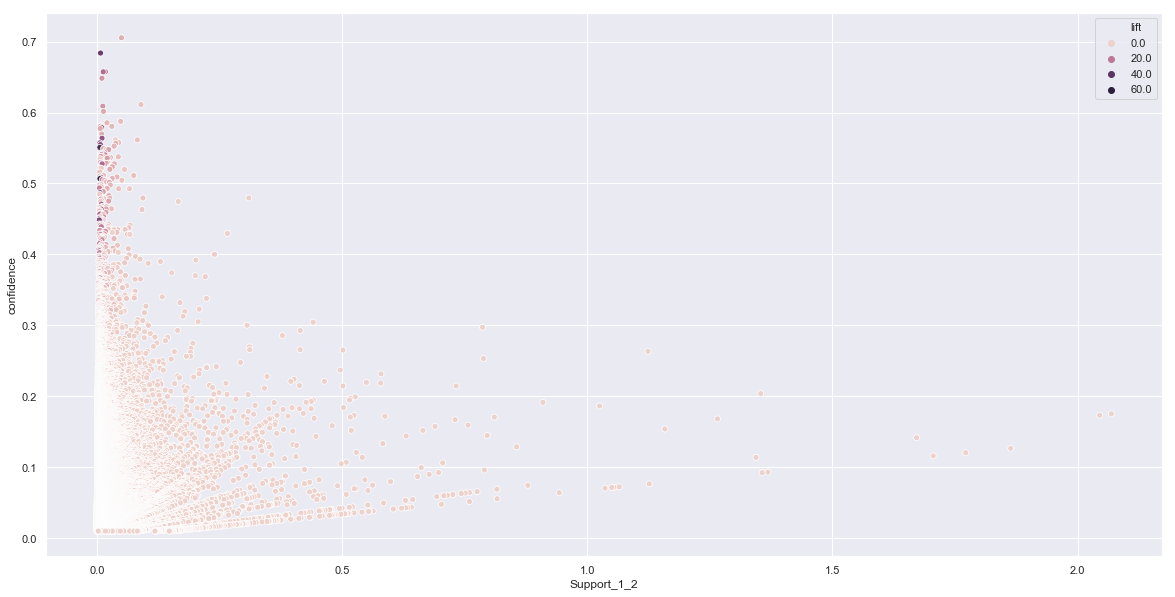

In [110]:
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]
ax = sns.scatterplot(x="Support_1_2", y="confidence", hue="lift", data=network)

In [111]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import json
from networkx.readwrite import json_graph

plt.rcParams['figure.figsize'] = [40, 40]

G = nx.from_pandas_edgelist(network,'items1','items2', edge_attr='lift', create_using=nx.DiGraph())
#durations = [i['lift'] for i in dict(G.edges).values()]
labels = [i for i in dict(G.nodes).keys()]
labels = {i:i for i in dict(G.nodes).keys()}

#nx.draw(G, with_labels=True, font_size = 6, node_size=100, alpha=0.7, arrows=True, pos=nx.fruchterman_reingold_layout(G))
nx.write_gexf(G, "test.gexf")

#d = json_graph.node_link_data(G)
#json.dump(d, open('force.json','w'))


'''fig, ax = plt.subplots(figsize=(12,5))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, ax = ax, labels=True, font_size = 6)
nx.draw_networkx_edges(G, pos)#, width=durations, ax=ax)
_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)'''

'fig, ax = plt.subplots(figsize=(12,5))\npos = nx.spring_layout(G)\nnx.draw_networkx_nodes(G, pos, ax = ax, labels=True, font_size = 6)\nnx.draw_networkx_edges(G, pos)#, width=durations, ax=ax)\n_ = nx.draw_networkx_labels(G, pos, labels, ax=ax)'

In [ ]:
df_apriori.sort_values(by='lift', ascending=False).head()

In [ ]:
from ipywidgets import widgets
from collections import Counter
from IPython.display import display
from IPython.display import clear_output
from itertools import combinations, groupby

In [ ]:
text = widgets.Text(
    value='Organic Raspberries',
    placeholder='Organic Raspberries|',
    description='Search:',
    disabled=False   
)

drop_down = widgets.Dropdown(
    options=list(count_prods[:200].index),
    value='Banana',
    description='Product:',
    disabled=False,
)

radio = widgets.RadioButtons(
    options=['search', 'dropdown'],
    value='dropdown',
    description='Use:',
    disabled=False
)



button = widgets.Button(
    description='Search',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

select = widgets.Select(
    options=['Support2', 'confidence', 'lift'],
    value='lift',
    # rows=10,
    description='Order:',
    disabled=False
)

def handle_submit(sender):
    clear_output()
    display(text)
    display(drop_down)
    display(radio)
    display(select)
    display(button)

    
    if radio == 'search':
        print("Search term: {}".format(text.value))
        display(df_pairs[df_pairs['items1'].str.contains(text.value)]).sort_values(by=select.value, ascending=False)['items2']
    else: 
        print("Search term: {}".format(drop_down.value))
        recom = df_pairs[df_pairs['items1'] == drop_down.value].sort_values(by=select.value, ascending=False)['items2']
        display(recom)

In [ ]:
##########################################################################################

In [ ]:
display(text)
display(drop_down)
display(radio)
display(select)
display(button)
button.on_click(handle_submit)

In [ ]:
basket_lists = orders_total_prior.groupby('order_id')['product_name'].apply(list)

In [ ]:
norm = [float(i)/max(count_prods.values) for i in count_prods.values]

In [ ]:
import numpy as np



idf = 1/(count_prods/N_Transactions)

np.log(idf)*norm

In [ ]:
# Affinity analysis
# TFIDF
# Complementary
# Substituvie
# Clustering -- PCA?
# Collaborative filtering
# W2vec Vectors
# Latent factor 

In [ ]:
#orders = pd.read_csv("../input/orders.csv")
#sample_submission = pd.read_csv("../input/sample_submission.csv")
#order_products_train = pd.read_csv("../input/order_products__train.csv")